In [1]:
from statsmodels.tools.sm_exceptions import ValueWarning

import VARmodel
import loadDataForSKtime
import ARIMAmodel
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ValueWarning)

In [2]:
loaderHR = loadDataForSKtime.PatientTimeSeriesLoader(
    "C:/Users/emily/Documents/DissertationProject/training/training_setA_csv", ['HR'])
sktime_df = loaderHR.load_data(100)
train_data, test_data = loaderHR.split_train_test(sktime_df)

<class 'list'>
Patient 26: Less than 15 time points — skipping.
Patient 27: Less than 15 time points — skipping.
Patient 34: Less than 15 time points — skipping.
Patient 55: Less than 15 time points — skipping.
Patient 56: Less than 15 time points — skipping.
Patient 58: Less than 15 time points — skipping.
Patient 60: Less than 15 time points — skipping.
Patient 61: Dropping — constant columns found
Patient 63: Less than 15 time points — skipping.
Patient 69: Less than 15 time points — skipping.
Patient 74: Less than 15 time points — skipping.


In [6]:
# load pickle file
import pandas as pd
train_data = pd.read_pickle("all_train_data_neg1fill.pkl")
test_data = pd.read_pickle("all_test_data_neg1fill.pkl")

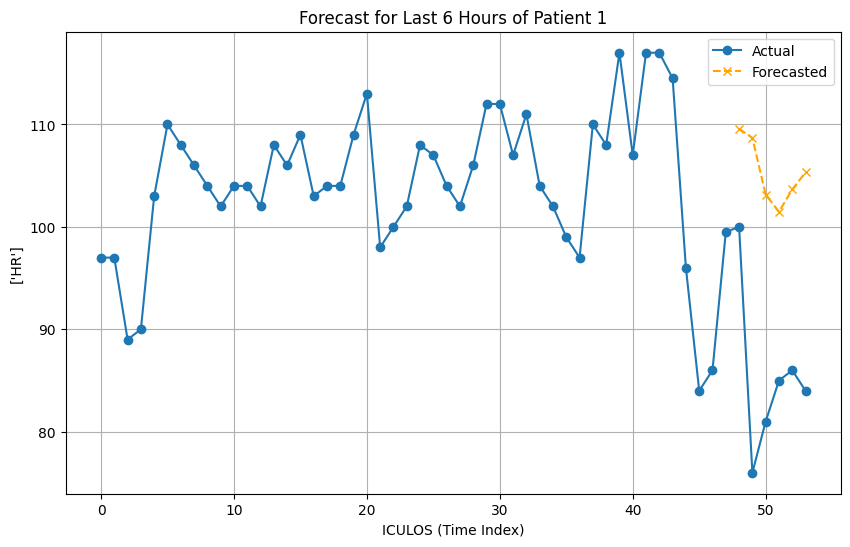

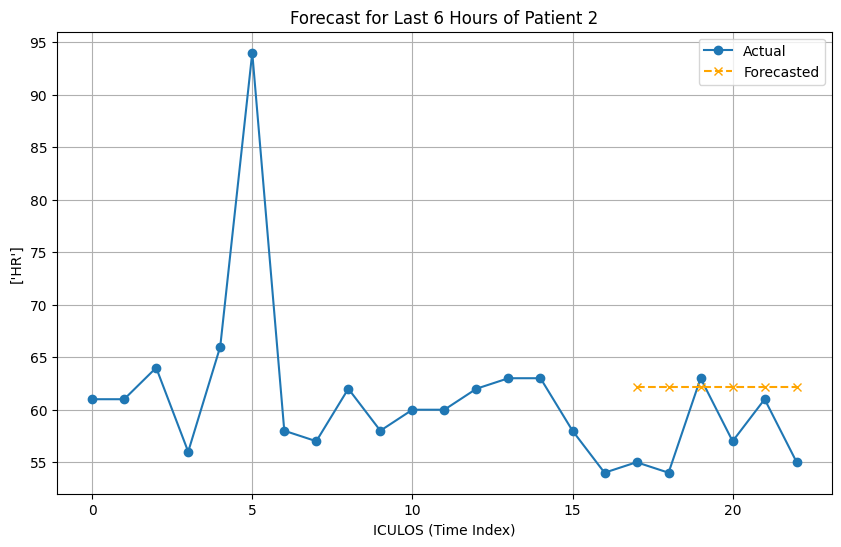

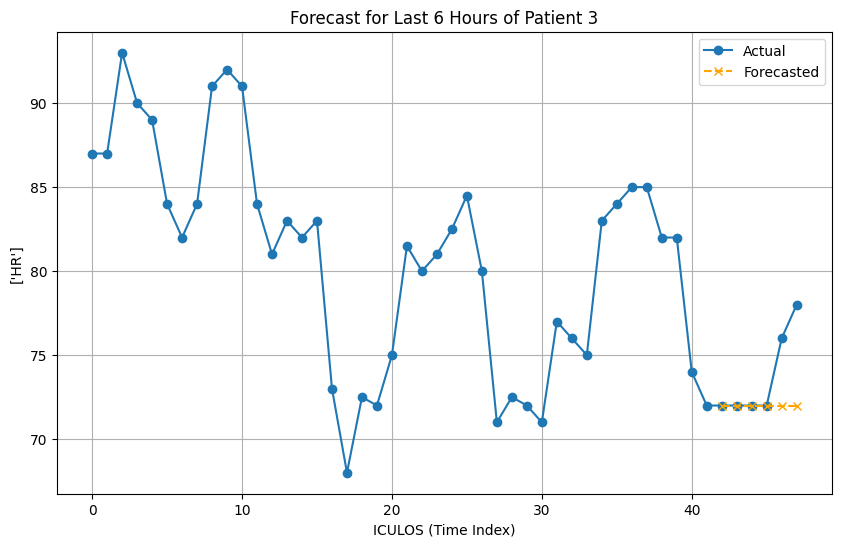

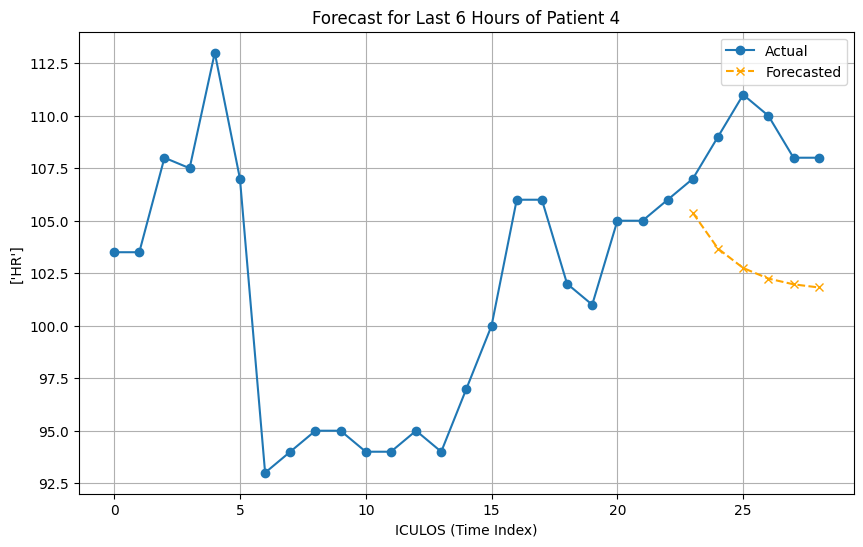

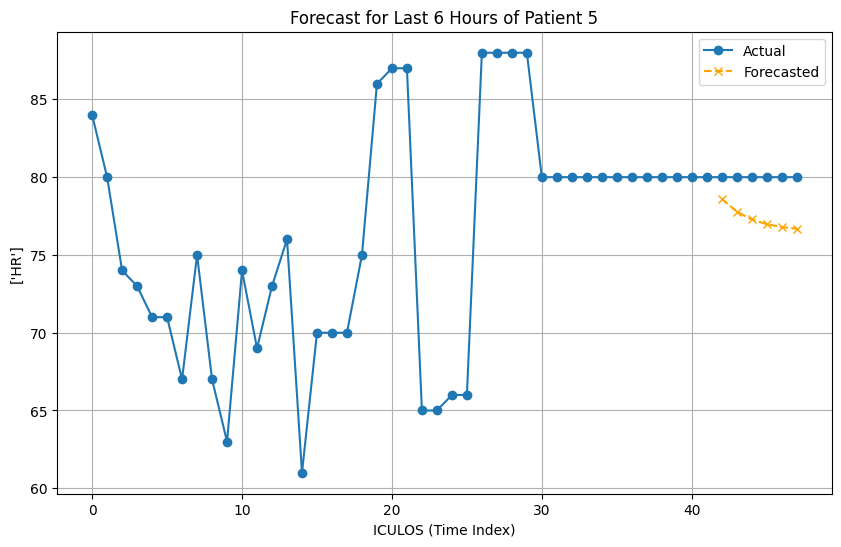

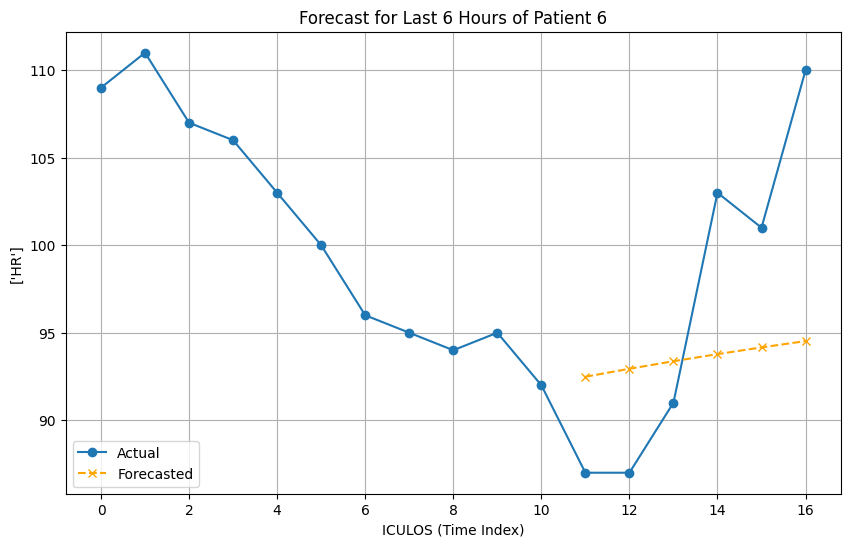

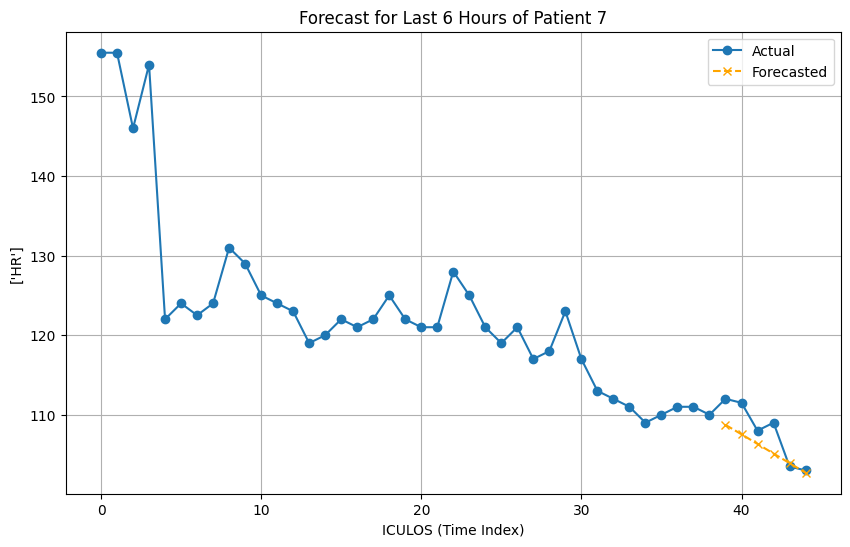

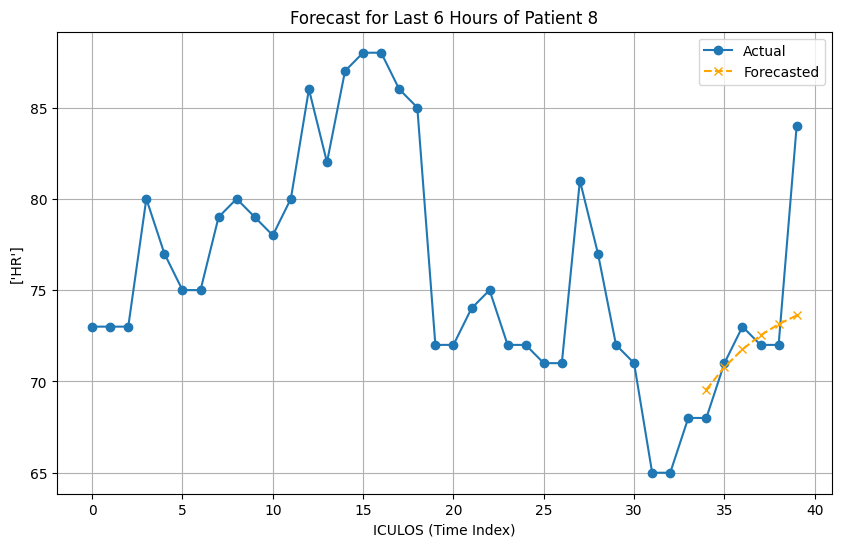

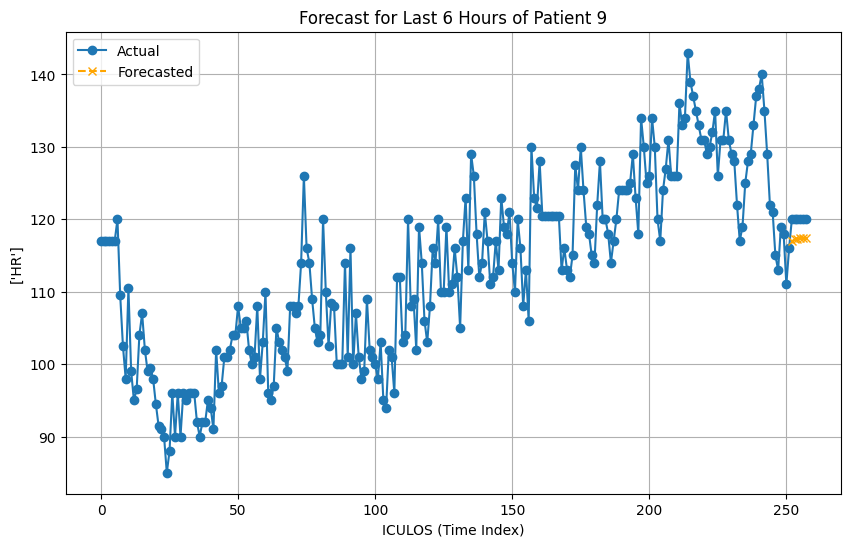

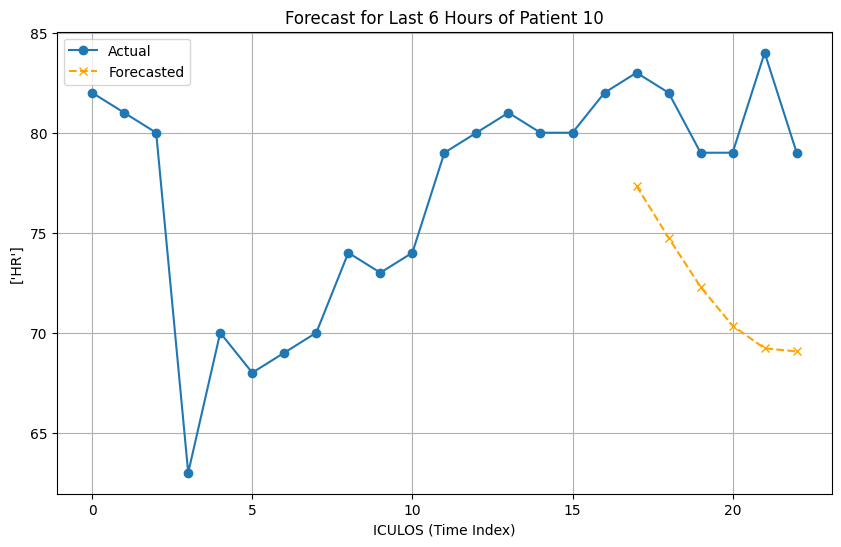

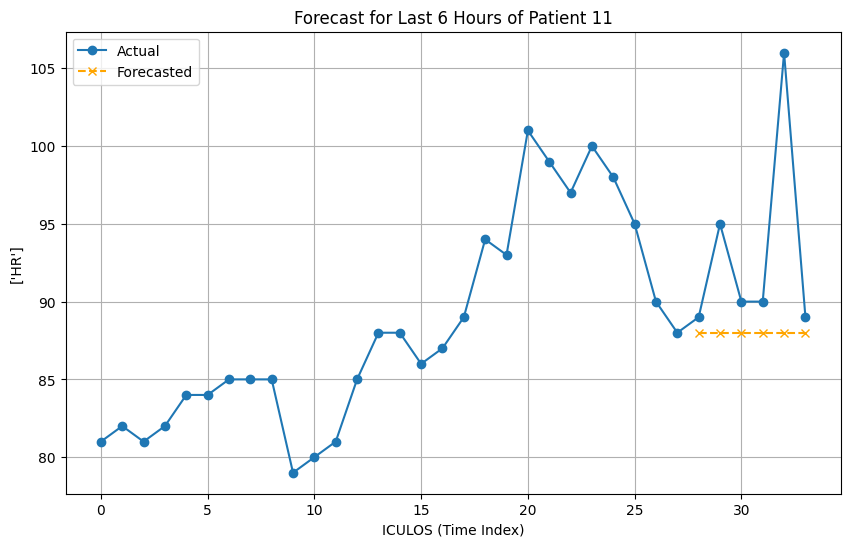

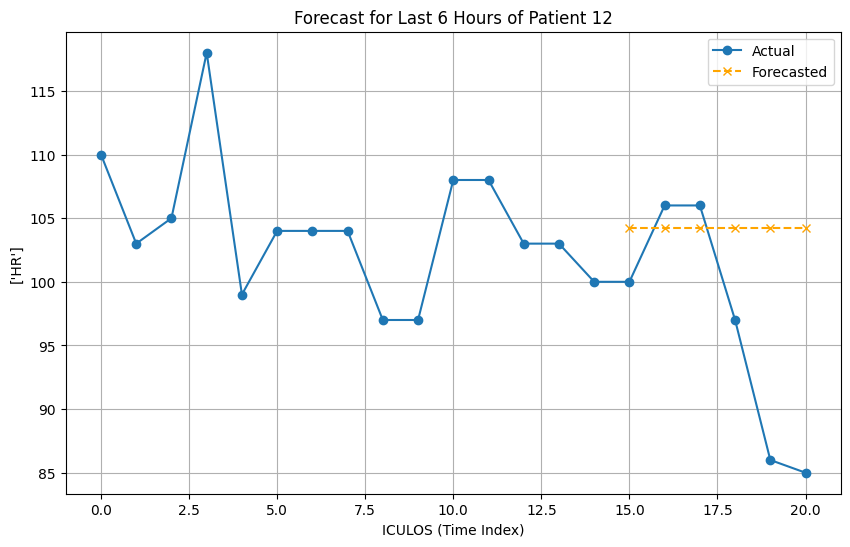

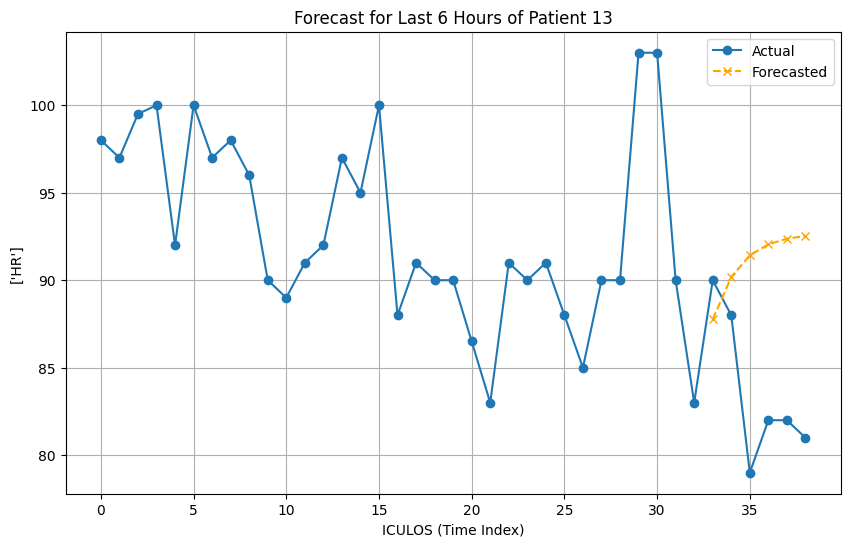

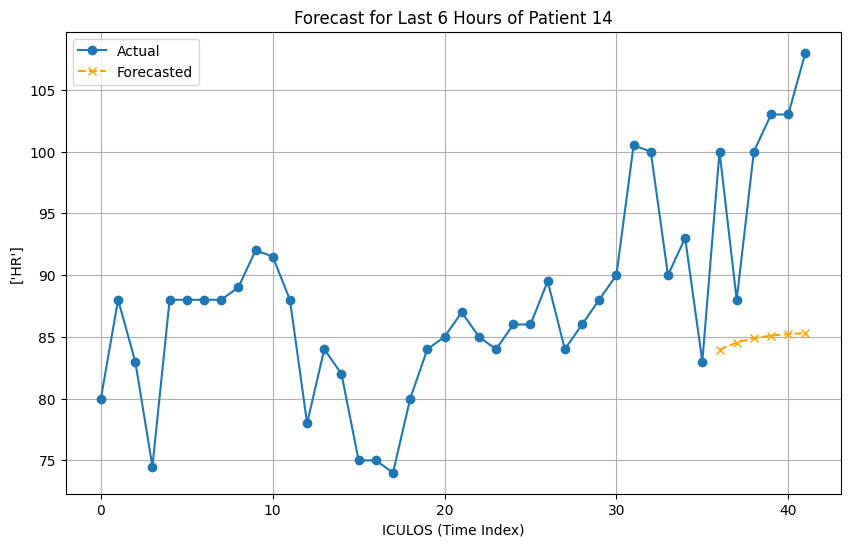

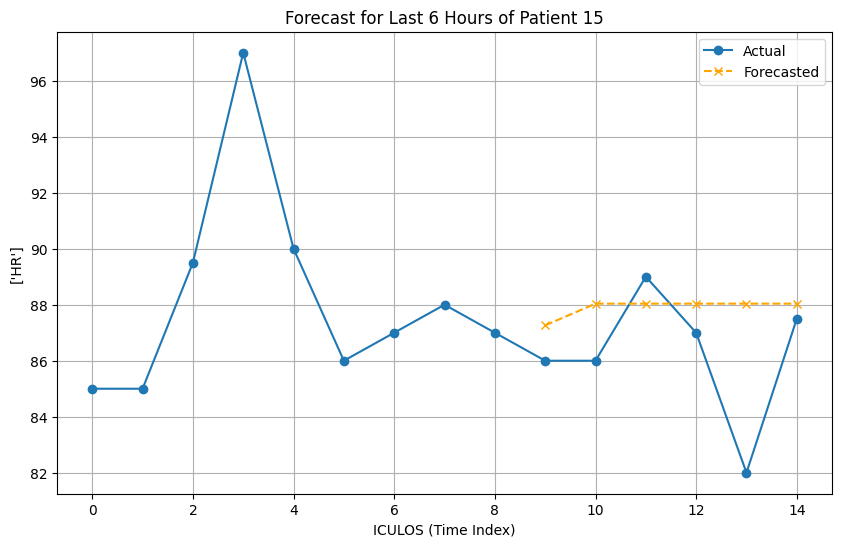

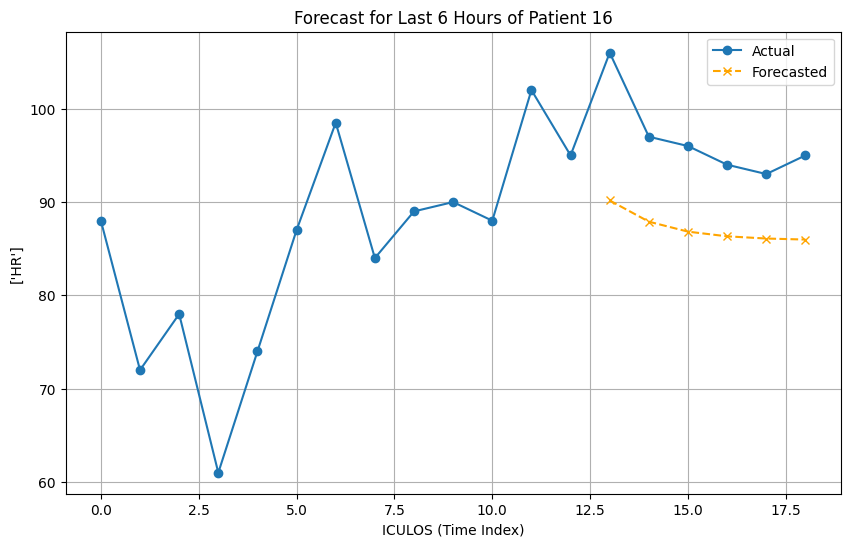

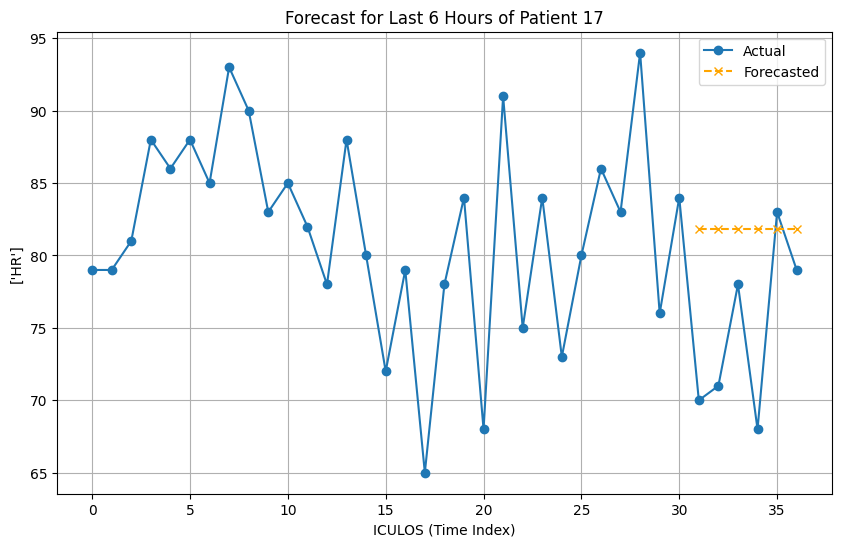

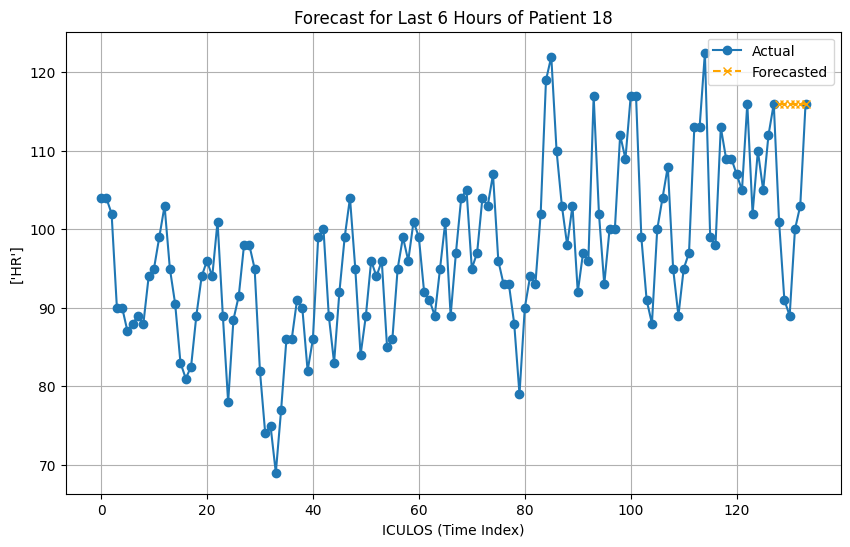

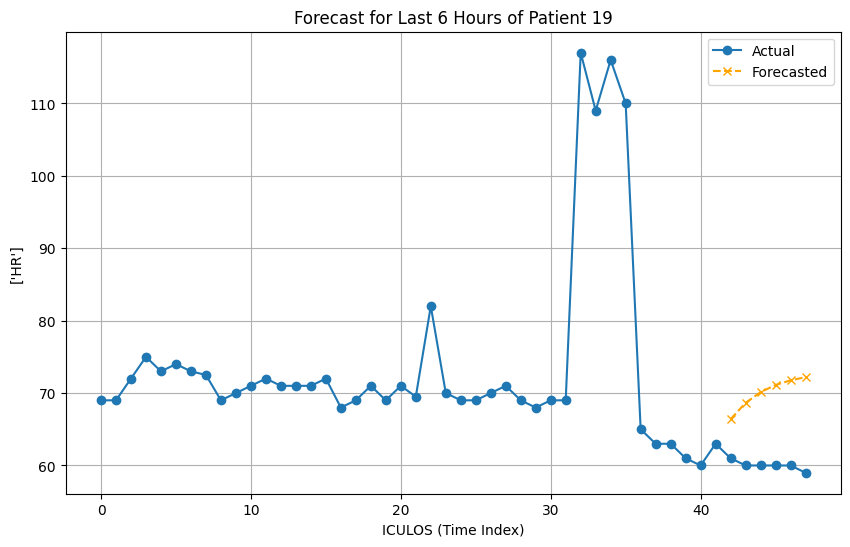

In [3]:
HRforecaster = ARIMAmodel.ARIMAForecaster(['HR'], train_data, test_data)
HRforecaster.fit()
forecasts = HRforecaster.predict(steps=6)

for patient_id in range(1, 20):
    if patient_id in forecasts.index.get_level_values("Patient_ID"):
        HRforecaster.plot_forecast(forecasts, patient_id=patient_id, steps=6)


In [4]:
print(forecasts)

                          HR
Patient_ID ICULOS           
1          49      92.916667
           50      92.916667
           51      92.916667
           52      92.916667
           53      92.916667
...                      ...
57         33      99.825274
           34      93.250421
           35      96.144844
           36      93.113611
           37      94.728422

[312 rows x 1 columns]


In [4]:
HRforecaster.evaluate_model(forecasts)

Model Evaluation Results:
  - Mean Absolute Error (MAE): 7.1970
  - Mean Squared Error (MSE): 92.8161
  - Root Mean Squared Error (RMSE): 9.6341
  - Mean Absolute Percentage Error (MAPE): 8.47%
  - Forecasting Accuracy: 91.53%


{'MAE': 7.1969664964094955,
 'MSE': 92.81609984523469,
 'RMSE': 9.634111263901548,
 'MAPE': 8.467108048234072,
 'Accuracy': 91.53289195176593}

In [5]:
import numpy as np
from sktime.distances import dtw_distance

x = np.array(test_data)
y = np.array(forecasts)
dtw_distance(x, y)

32917.936310067875